# Clasificación de imágenes y explicación con GradCAM
* Ejemplo obtenido de la documentación de [tf-keras-vis](https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html#GradCAM)





In [1]:
! pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.0 MB/s eta 0:00:00


In [2]:

# Para montar el Google Drive.
# '/content/gdrive' especifica el punto de montaje, lo que permite acceder a
# los archivos usando la rurta '/content/gdrive/My Drive/'

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

import time

## Modelo Caja Negra

El modelo de caja negra a explicar es una red neuronal convolucional, *Convolutional Neural Network* (CNN) en inglés.

### Arquitectura

La CNN en cuestión es [VGG16](https://arxiv.org/abs/1409.1556): un modelo preentrenado en [ImageNet](https://paperswithcode.com/dataset/imagenet) para clasificación de imágenes y disponible en [Keras](https://keras.io/api/applications/vgg/).


En el siguiente [enlace](https://www.researchgate.net/figure/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only_fig3_322512435) se puede visualizar la arquitectura de InceptionV3.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

start = time.time()
model = Model(weights='imagenet', include_top=True)
end = time.time()
print("Tiempo de ejecución: ", end - start)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
Tiempo de ejecución:  29.572187423706055


## Imágenes de prueba
* Descargar la imágen desde el siguiente [link](https://drive.google.com/drive/folders/1FplNWSGRIDB4TDD2-UiwXH-N2vXWWurF?usp=sharing)
* Luego guardar esa imagen en un directorio de tu cuenta en Google Drive

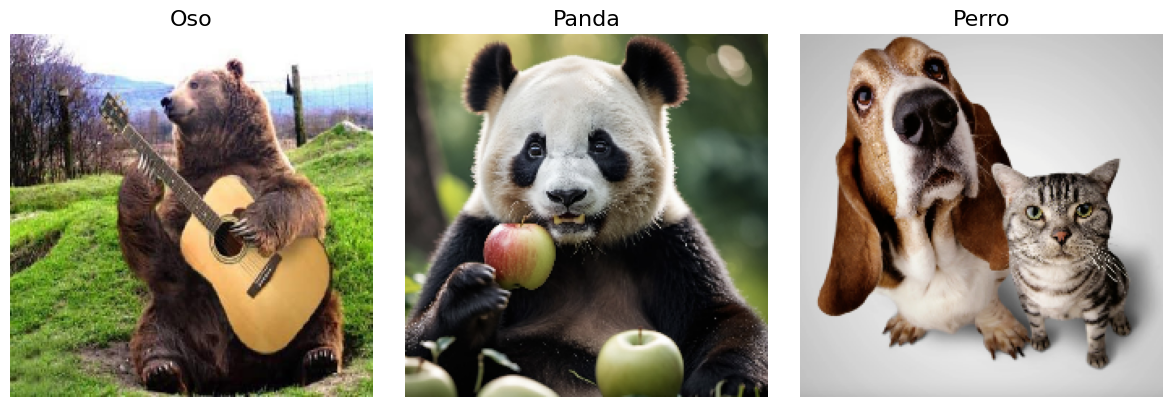

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Título de las imágenes
image_titles = ['Oso', 'Panda', 'Perro']

# Cargar las imágenesá y transformarlas a arreglos de numpy
img1 = load_img("/content/gdrive/MyDrive/00_Taller_XAI/bear.jpg", target_size=(224, 224))
img2 = load_img("/content/gdrive/MyDrive/00_Taller_XAI/panda.png", target_size=(224, 224))
img3 = load_img("/content/gdrive/MyDrive/00_Taller_XAI/perrogato3.png", target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preprocesamiento de los datos para entrar a VGG16
X = preprocess_input(images)

# Mostrando imágenes
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [6]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

## Selección de clase que se quiere explicar

En el dataset Imagenet
* 294 es la etiqueta de la clase oso café
* 388 es la etiqueta de la clase Panda
* 161 es la etiqueta de la clase perro raza basset hound
* 282 es la etiqueta de la clase tiger cat
* 948 es la etiquieta de la clase manzana Granny Smith


In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

score = CategoricalScore([294, 388, 161]) # función que toma los scores
                                          #de la salida del modelo que se utiliza para la clasificación categórica.


Tiempo de ejecución:  9.036002397537231


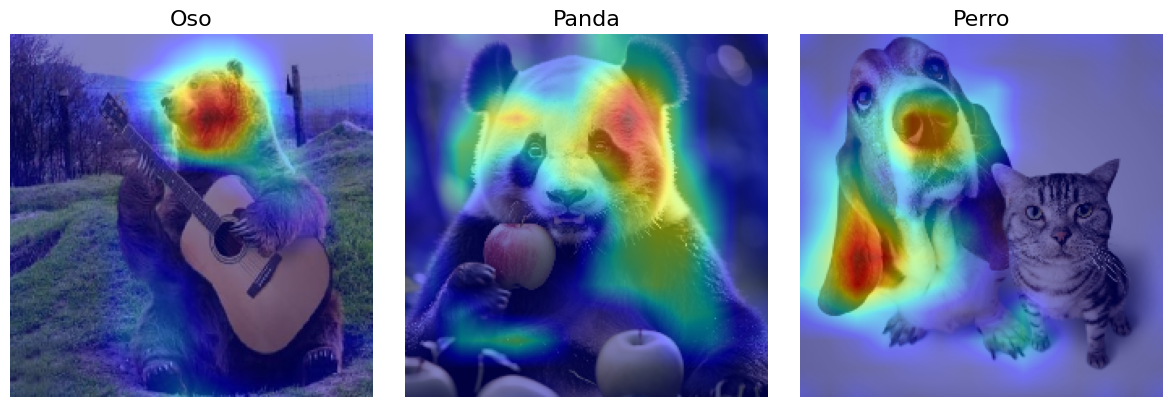

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

#Creación del objeto Gradcam
gradcam = Gradcam(model,
                  model_modifier=replace2linear, # Se reemplaza softmax con una función de activación lineal (sin función de activación) en la última capa.
                  clone=True)                    # Se preservan las salidas originales del modelo sin normalización,
                                                 #permitiendo que los gradientes sean más directos y reflejen correctamente la contribución de cada neurona a la predicción final.

# Generación del mapa de calor
start = time.time()
cam = gradcam(score,
              X, # imágenes preprocesadas
              penultimate_layer=-1)
end = time.time()
print("Tiempo de ejecución: ", end - start)

# Mostrar mapas
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()